**Task 5 and 6: Reading the file and Interpolation**

This notebook checks the use if the data from file is being read properly and if system of interpolation works.

In [14]:
#importing all necessary functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

!rm -rf CNM_2025_group_13
!git clone https://github.com/liz-lewis-manchester/CNM_2025_group_13.git

sys.path.append('/content/CNM_2025_group_13')

from src.domain import setup_domain


Cloning into 'CNM_2025_group_13'...
remote: Enumerating objects: 437, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 437 (delta 67), reused 32 (delta 32), pack-reused 318 (from 1)
Receiving objects: 100% (437/437), 210.77 KiB | 16.21 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [15]:
#setting up the parameter needed
L = 20.0
Delta_x = 0.2

#Using domain.py to create the x array of the grid
x_array = np.linspace(0, L, int(L / Delta_x) + 1)


In [16]:
#Reading the data from data folder in the repository
csv_path = "/content/CNM_2025_group_13/data/initial_conditions.csv"

sensor_data = pd.read_csv(csv_path)
sensor_data


,Distance (m),Concentration (µg/m_ )
0,0,300
1,1,10
2,2,10
3,3,10
4,4,10
5,5,8
6,6,8
7,7,8
8,8,8
9,9,7


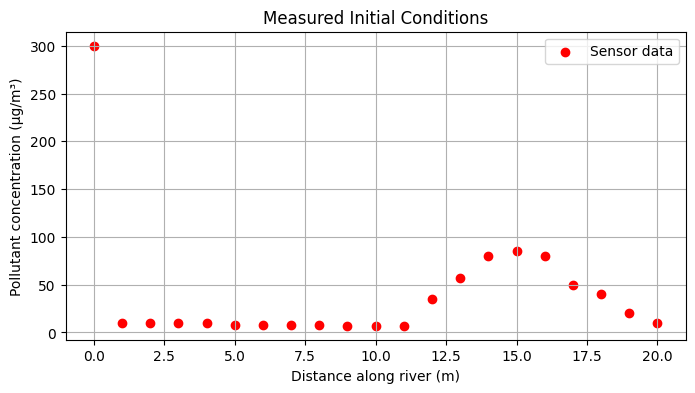

In [17]:
#Ploting graph with values from the file
plt.figure(figsize=(8, 4))
plt.scatter(sensor_data["Distance (m)"], sensor_data["Concentration (µg/m_ )"], color="red", label="Sensor data")
plt.xlabel("Distance along river (m)")
plt.ylabel("Pollutant concentration (µg/m³)")
plt.title("Measured Initial Conditions")
plt.legend()
plt.grid()
plt.show()



In [18]:
#interpolating the data
C_initial = np.interp(
    x_array,
    sensor_data["Distance (m)"],
    sensor_data["Concentration (µg/m_ )"]
)


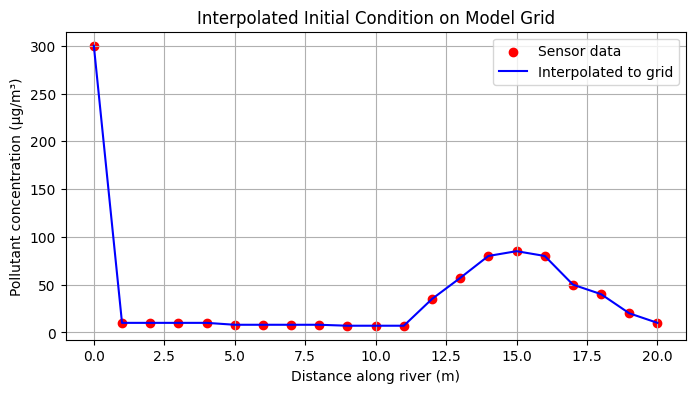

In [19]:
#Plotting graph with values from the file and from the interpolation
plt.figure(figsize=(8, 4))
plt.scatter(sensor_data["Distance (m)"], sensor_data["Concentration (µg/m_ )"],
            color="red", label="Sensor data")
plt.plot(x_array, C_initial,
         color="blue", label="Interpolated to grid")

plt.xlabel("Distance along river (m)")
plt.ylabel("Pollutant concentration (µg/m³)")
plt.title("Interpolated Initial Condition on Model Grid")
plt.legend()
plt.grid()
plt.show()


In [21]:
# Check if the interpolated values match the file
assert len(C_initial) == len(x_array)


print("Tasks 5 and 6 passed")


Tasks 5 and 6 passed


**Conclusion:**
It was tested:
- task 5: Reading the csv file
- Task 6: interpolating the data into the created grid

Both tests were successful